In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

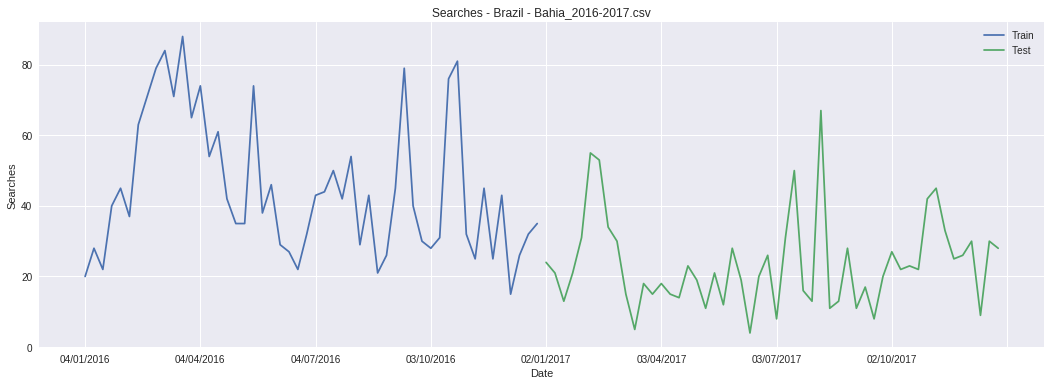

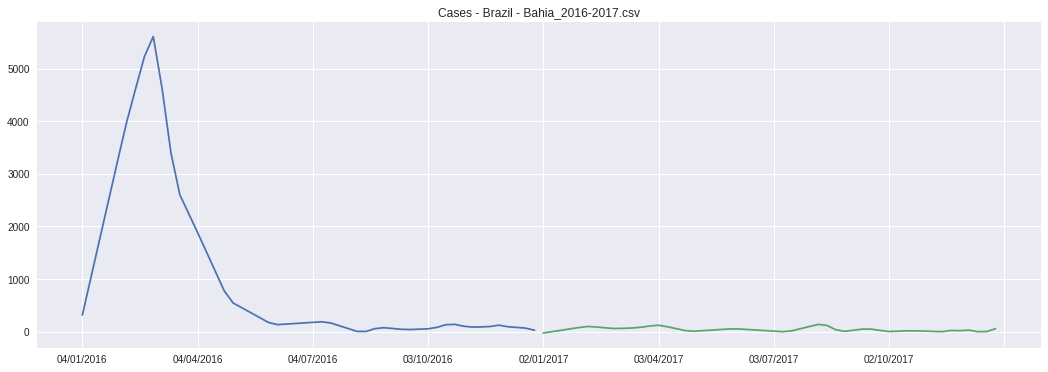

Correlation Matrix Brazil - Bahia_2016-2017.csv:
[[1.         0.55454524]
 [0.55454524 1.        ]]


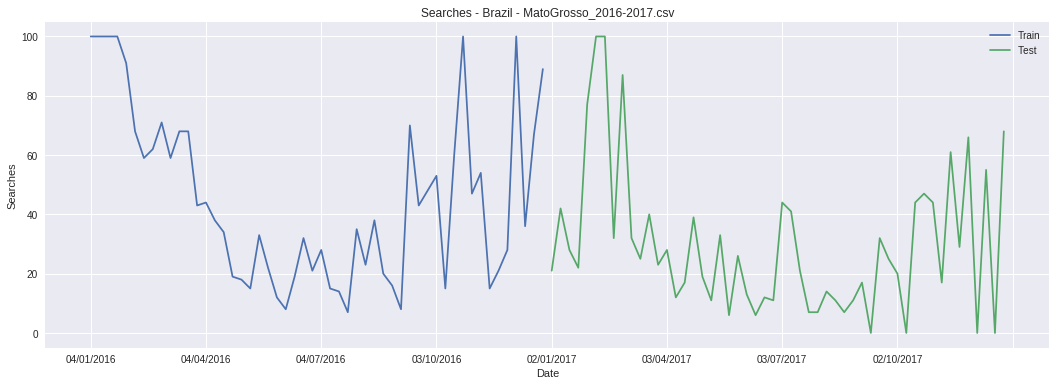

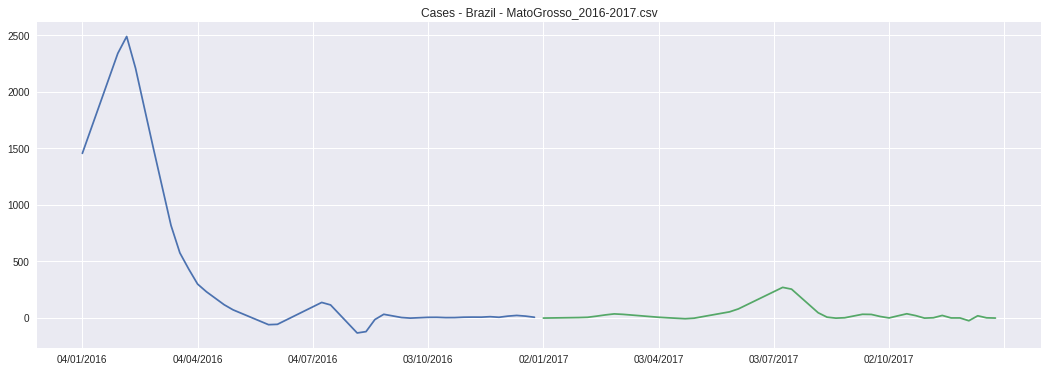

Correlation Matrix Brazil - MatoGrosso_2016-2017.csv:
[[1.        0.5073854]
 [0.5073854 1.       ]]


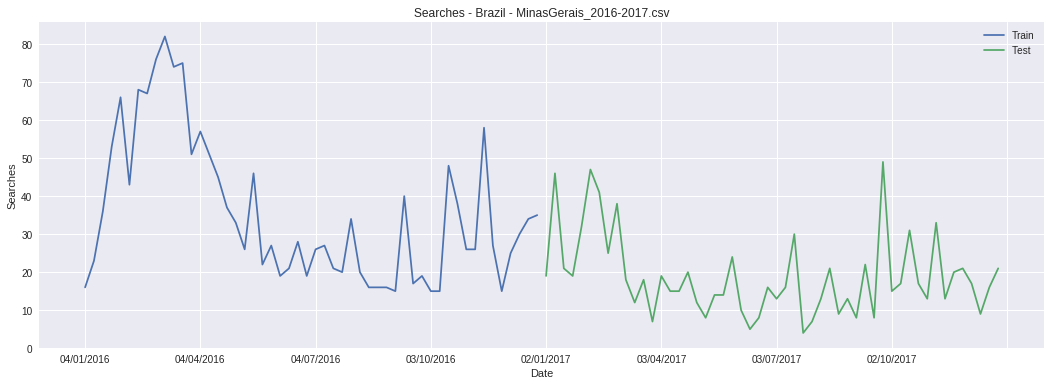

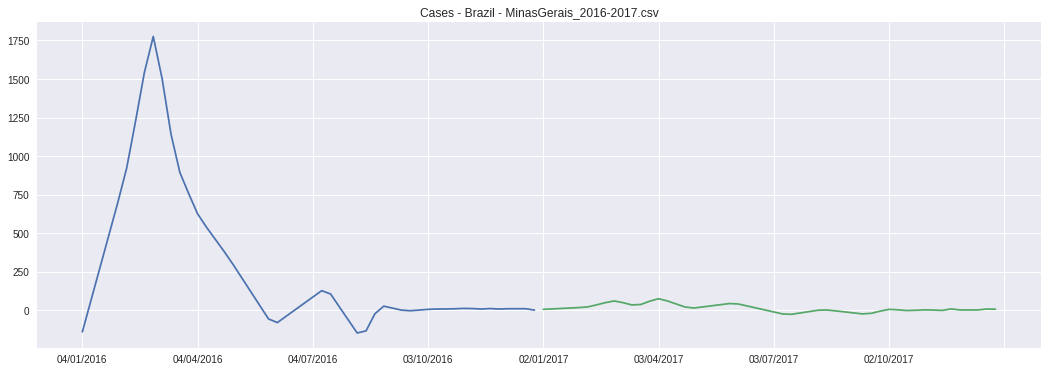

Correlation Matrix Brazil - MinasGerais_2016-2017.csv:
[[1.         0.78121192]
 [0.78121192 1.        ]]


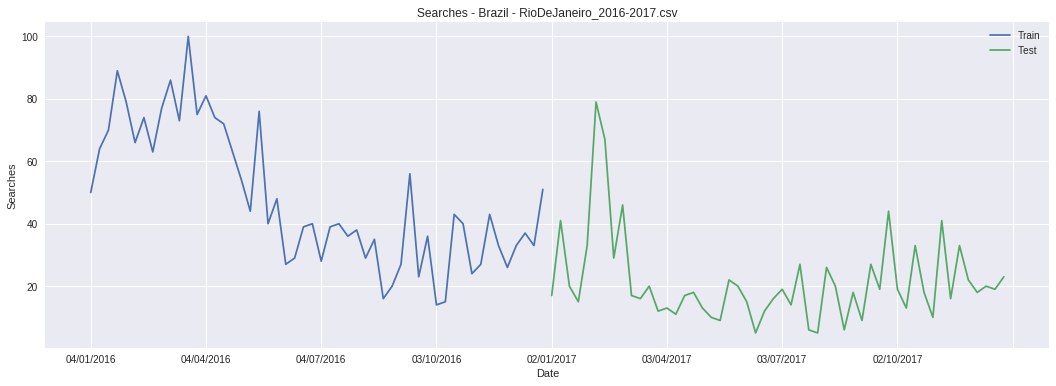

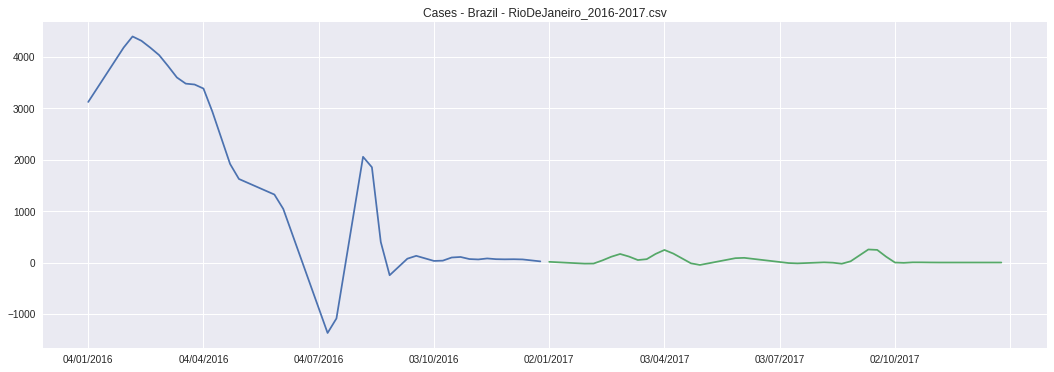

Correlation Matrix Brazil - RioDeJaneiro_2016-2017.csv:
[[1.         0.76660972]
 [0.76660972 1.        ]]


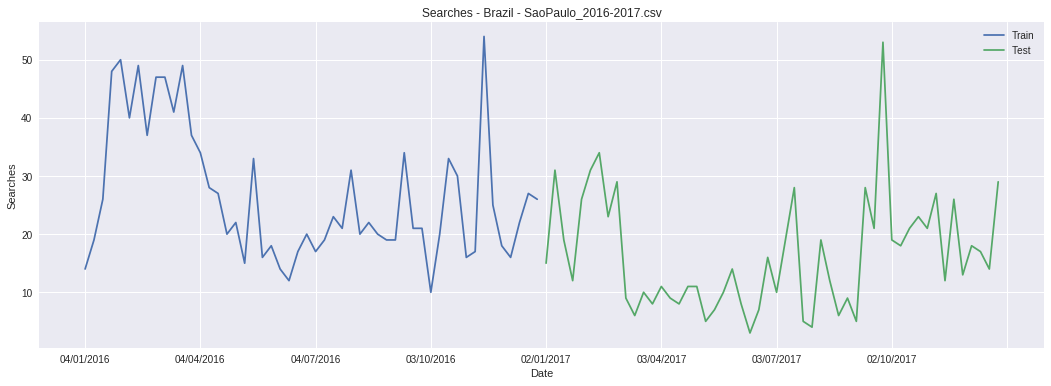

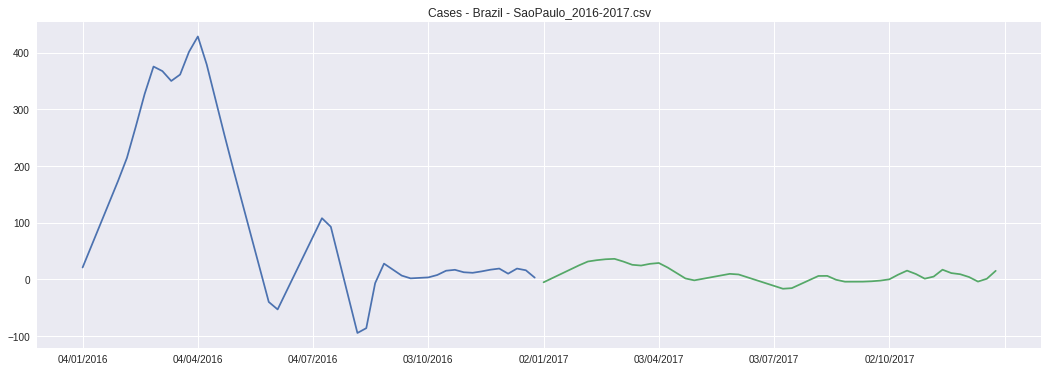

Correlation Matrix Brazil - SaoPaulo_2016-2017.csv:
[[1.         0.55439631]
 [0.55439631 1.        ]]


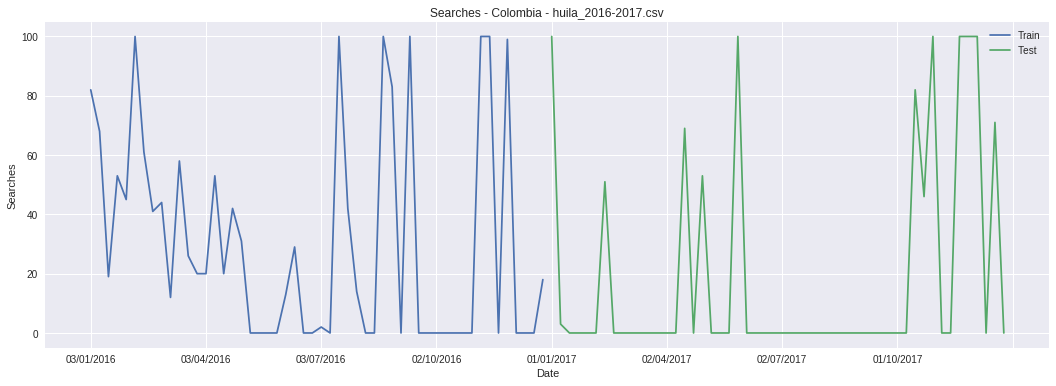

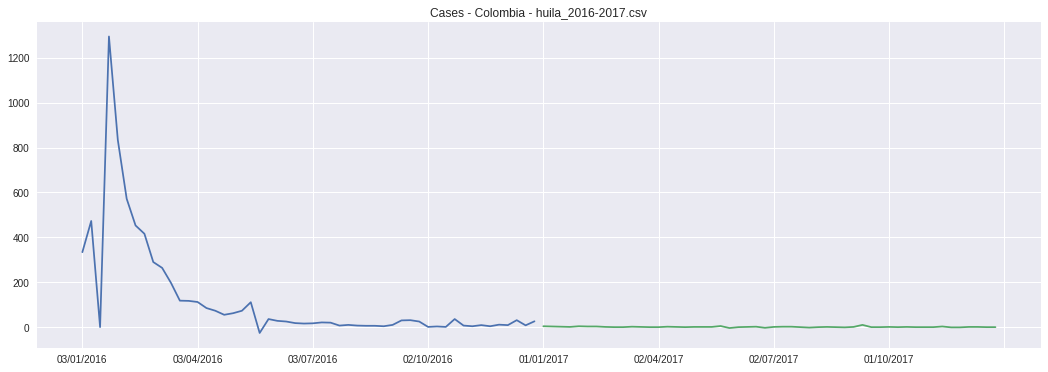

Correlation Matrix Colombia - huila_2016-2017.csv:
[[1.         0.24644727]
 [0.24644727 1.        ]]


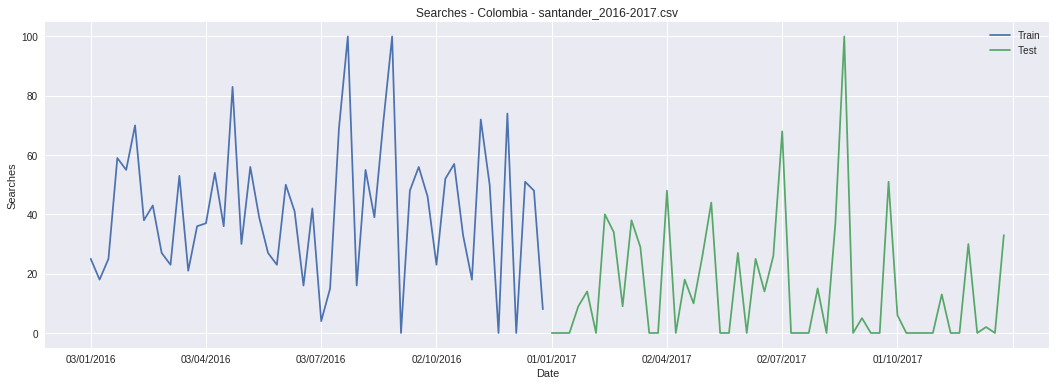

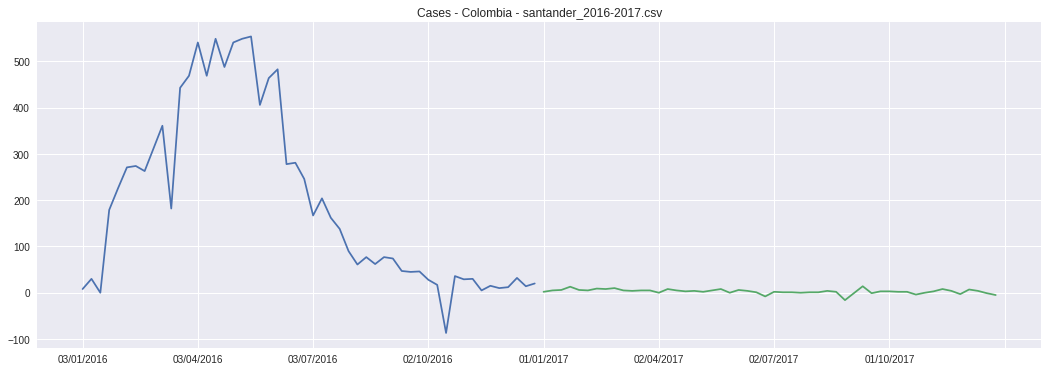

Correlation Matrix Colombia - santander_2016-2017.csv:
[[1.         0.29890221]
 [0.29890221 1.        ]]


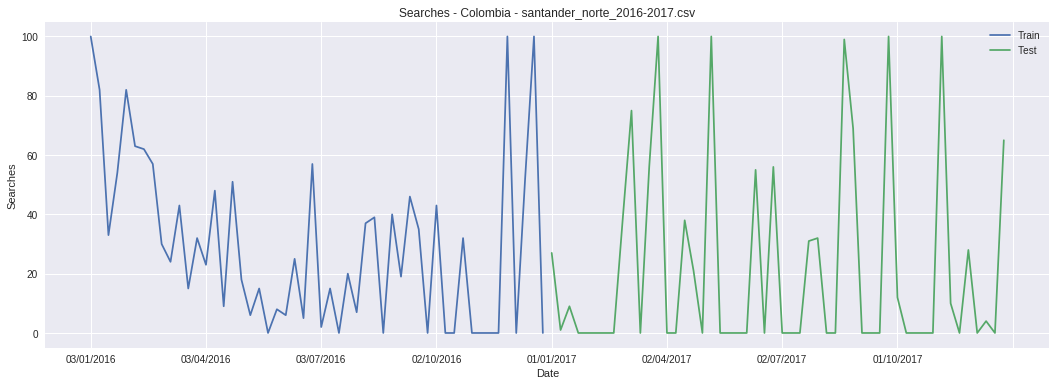

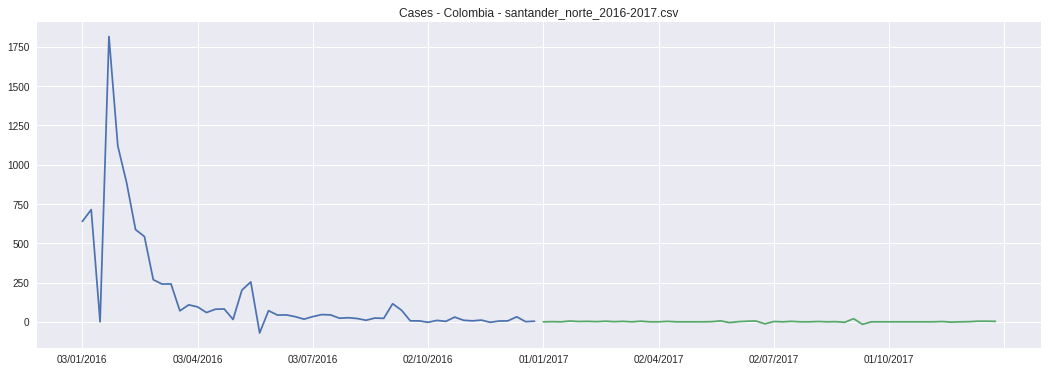

Correlation Matrix Colombia - santander_norte_2016-2017.csv:
[[1.         0.33401335]
 [0.33401335 1.        ]]


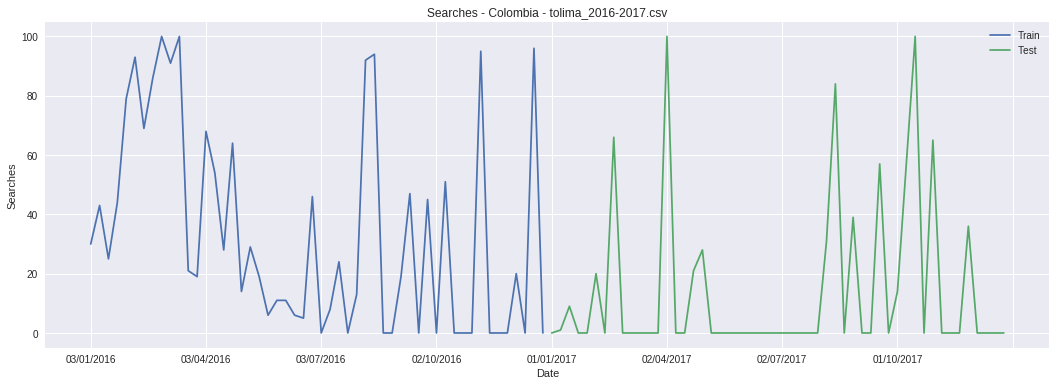

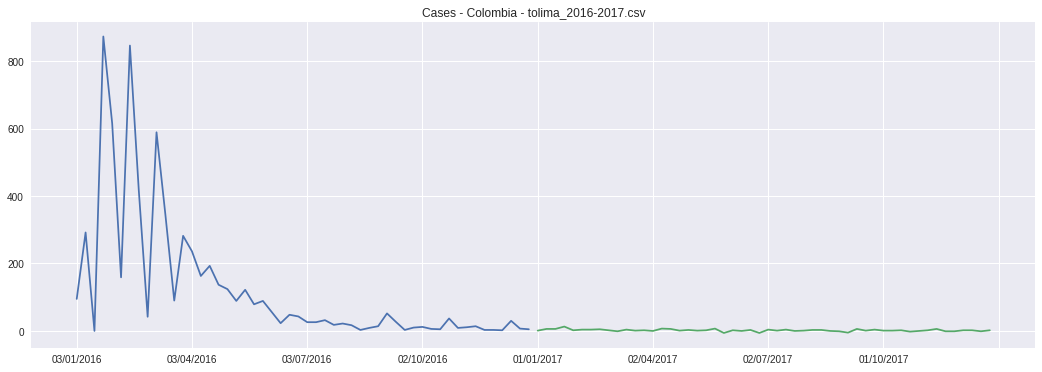

Correlation Matrix Colombia - tolima_2016-2017.csv:
[[1.         0.40662988]
 [0.40662988 1.        ]]


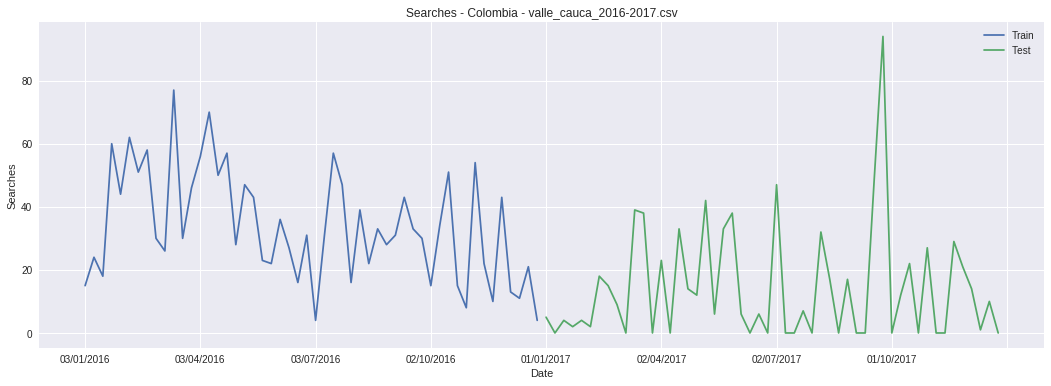

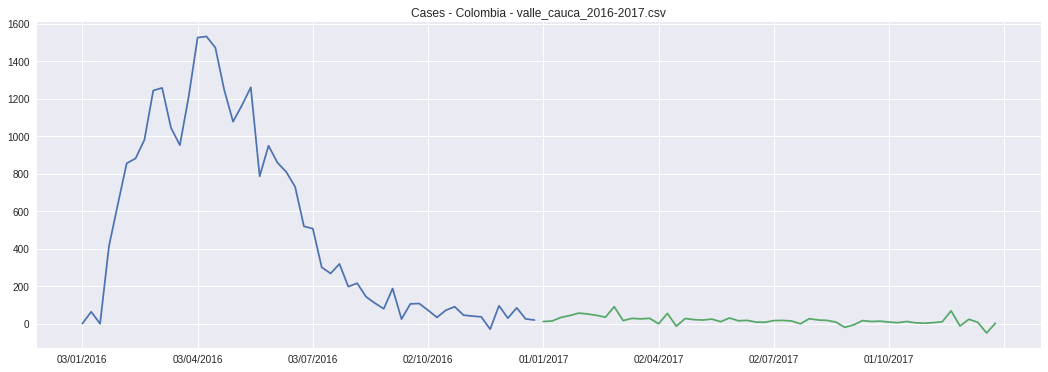

Correlation Matrix Colombia - valle_cauca_2016-2017.csv:
[[1.         0.52543664]
 [0.52543664 1.        ]]


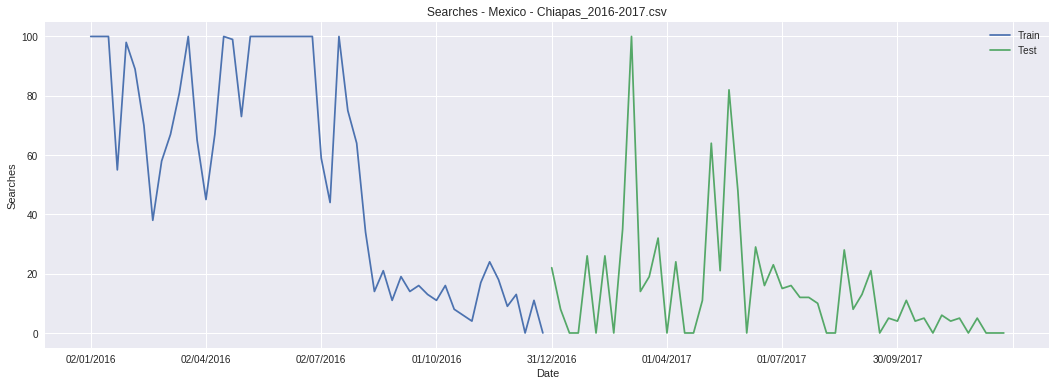

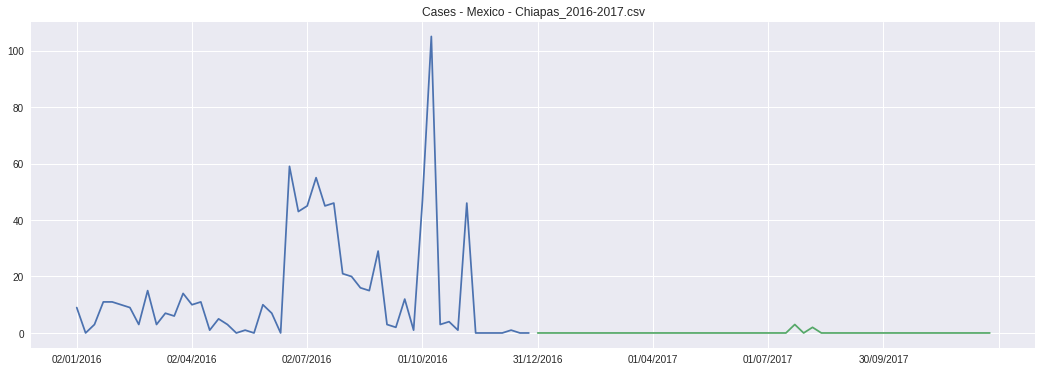

Correlation Matrix Mexico - Chiapas_2016-2017.csv:
[[1.         0.22943873]
 [0.22943873 1.        ]]


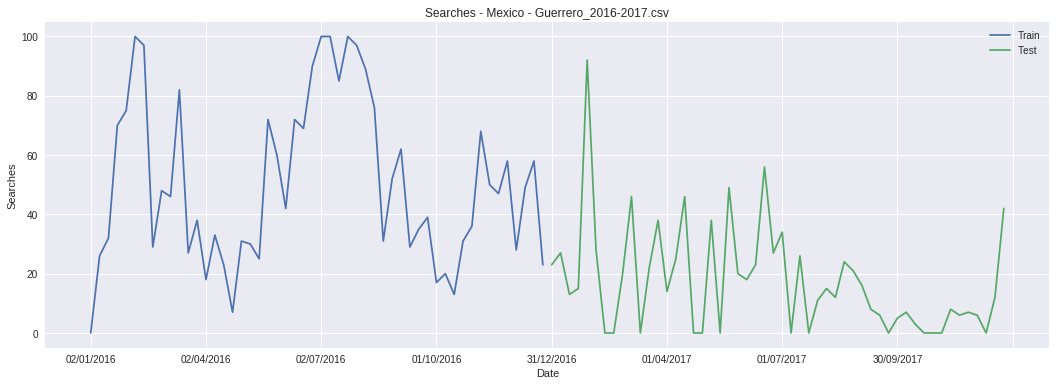

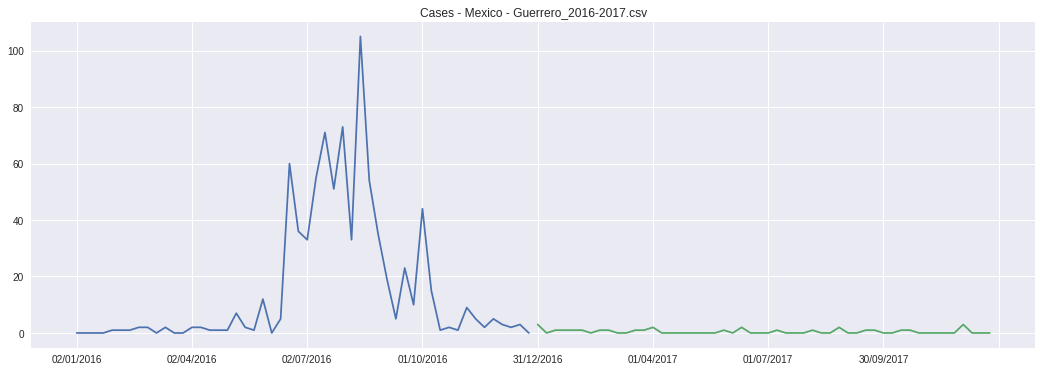

Correlation Matrix Mexico - Guerrero_2016-2017.csv:
[[1.         0.52055987]
 [0.52055987 1.        ]]


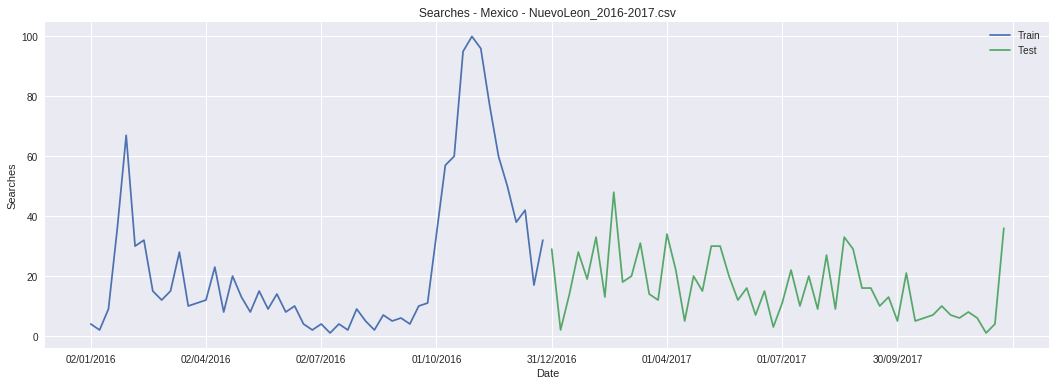

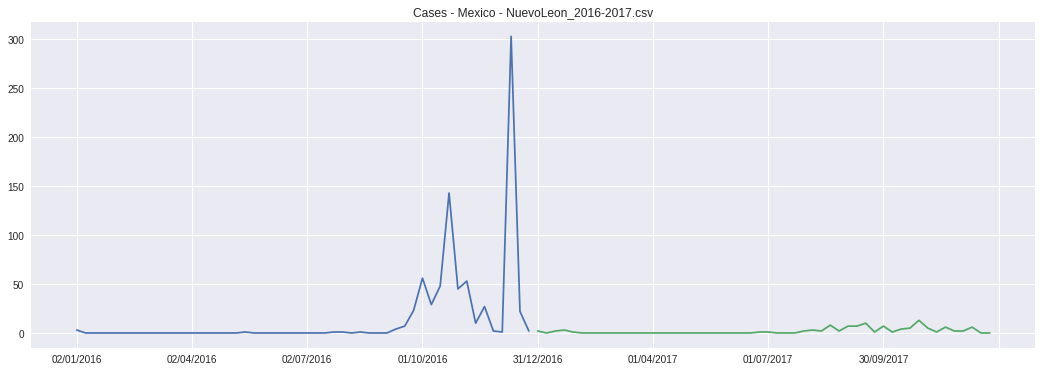

Correlation Matrix Mexico - NuevoLeon_2016-2017.csv:
[[1.         0.41180928]
 [0.41180928 1.        ]]


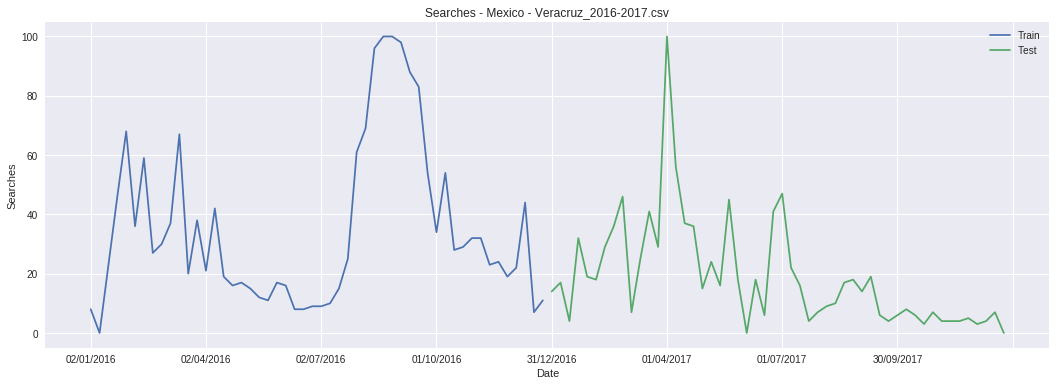

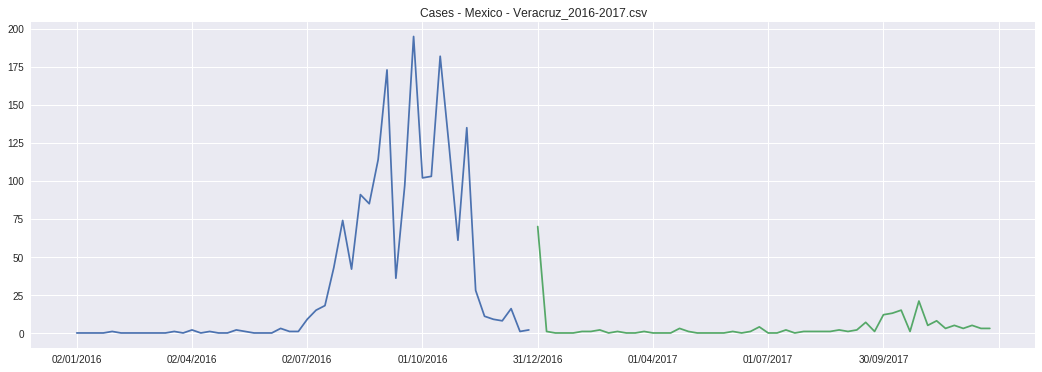

Correlation Matrix Mexico - Veracruz_2016-2017.csv:
[[1.        0.4814498]
 [0.4814498 1.       ]]


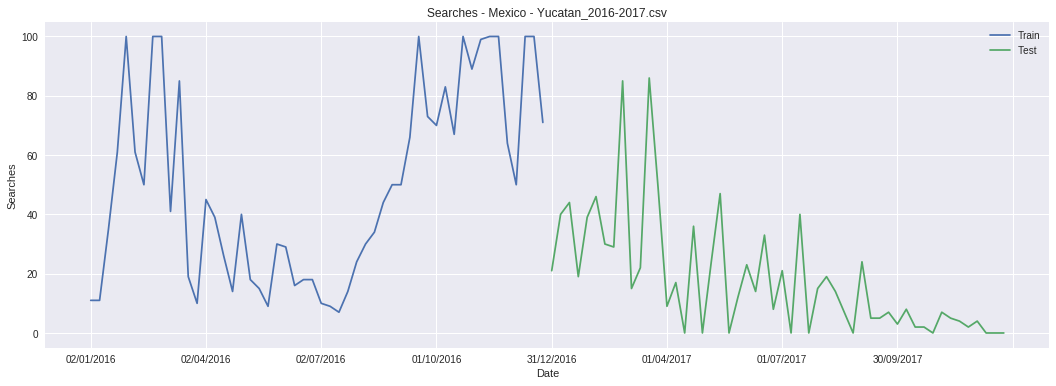

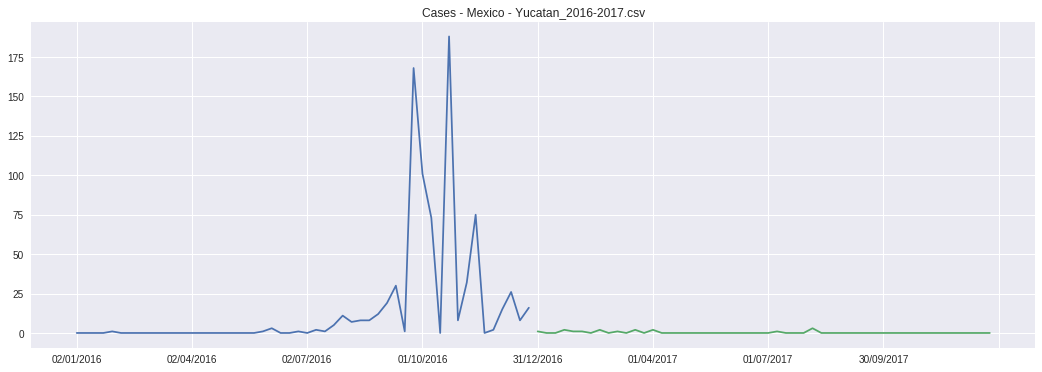

Correlation Matrix Mexico - Yucatan_2016-2017.csv:
[[1.         0.41442942]
 [0.41442942 1.        ]]


In [40]:
countries = ["Brazil", "Colombia", "Mexico"]

for country in countries:
  states = os.listdir("drive/My Drive/ziknet-trends-rolling/data/{}/processed_data".format(country))
  
  for state in states:
    df = pd.read_csv("drive/My Drive/ziknet-trends-rolling/data/{}/processed_data/{}".format(country, state))
    
    df_train = df[:len(df)//2]
    df_test = df[len(df)//2:]
    
    fig = plt.figure(figsize=(18,6))
    plt.plot(df_train["Date"], df_train["Searches"], label="Train")
    plt.plot(df_test["Date"], df_test["Searches"], label="Test")
    plt.title("Searches - {} - {}".format(country, state))
    plt.xlabel("Date")
    plt.ylabel("Searches")
    plt.legend()
    
    plt.xticks(np.arange(0, len(df)+1, 13))
    plt.show()
    
    fig = plt.figure(figsize=(18,6))
    plt.plot(df_train["Date"], df_train["Cases"], label="Train")
    plt.plot(df_test["Date"], df_test["Cases"], label="Test")
    plt.title("Cases - {} - {}".format(country, state))
    
    plt.xticks(np.arange(0, len(df)+1, 13))
    plt.show()
    
    print("Correlation Matrix {} - {}:".format(country, state))
    print(np.corrcoef(df["Searches"], df["Cases"]))